# Trabalho Prático do Módulo 1

In [1]:
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

## Pergunta 1
### Qual o objetivo do algoritmo K-Means?
R - Clusterização (4ª alternativa)

## Pergunta 2
### O algoritmo K-Means é baseado em qual tipo de aprendizagem?
R - Não supervisionada (3ª alternativa)

## Pergunta 3
### Considerando o dataset gerado a partir das instruções do enunciado, qual das imagens representa o gráfico correto?
(1ª alternativa)

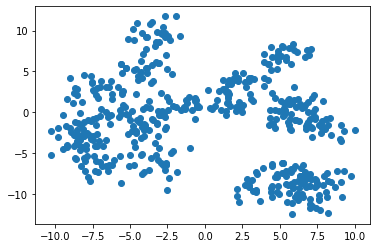

In [2]:
X, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(X[:,0], X[:,1])
plt.show()

## Pergunta 4
### Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo K-Means seja executado buscando apenas 1 cluster, qual será a coordenada do centroide ao final da execução?
(4ª alternativa)

In [6]:
kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(X)

print(kmeans.cluster_centers_)

[[ 0.02618523 -1.30384304]]


## Pergunta 5
### Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando apenas 1 cluster, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?
(4ª alternativa)

In [4]:
kmeans.inertia_

31547.372471390485

## Pergunta 6
### Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando 5 clusters, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?
(4ª alternativa)

In [5]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(X)

print(kmeans.inertia_)

4717.404091931214


## Pergunta 7
### Considerando o dataset gerado a partir das instruções do enunciado. Qual o número ideal de clusters?
(4ª alternativa)

In [6]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

In [7]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

n = optimal_number_of_clusters(wcss)

In [8]:
n

4